# Decision Tree

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
# 데이터 로드 

df = pd.read_csv('./data/encoded_movies_data.csv')
df

,Title,Year,Duration,MPA,budget,directors,writers,stars,production_companies,Category,Profit,Hit
0,1. Star Wars: Episode III - Revenge of the Sith,2005,140.0,PG-13,1.130000e+08,2105,2308,2155,3300,4,752.243925,1
1,"2. The Chronicles of Narnia: The Lion, the Wit...",2005,143.0,PG,1.800000e+08,355,490,5487,5179,4,413.896175,1
2,3. Harry Potter and the Goblet of Fire,2005,157.0,PG-13,1.500000e+08,4222,6201,1326,5188,5,598.312635,1
3,4. War of the Worlds,2005,117.0,PG-13,1.320000e+08,5678,3431,5535,3944,4,457.479927,1
4,5. King Kong,2005,187.0,PG-13,2.070000e+08,4705,2186,4183,5082,4,269.036898,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10695,596. Vettaiyan,2024,163.0,Not Rated,1.390000e+09,5762,6323,1809,3323,0,0.172491,0
10696,597. Nr. 24,2024,111.0,Not Rated,3.159483e+08,2891,2093,3732,4381,4,1.045100,0
10697,598. Parallel,2024,88.0,Not Rated,5.322545e+07,3436,212,1335,4367,3,0.000000,0
10698,599. Fight or Flight,2024,166.0,Not Rated,2.043857e+08,2526,972,2887,625,0,0.000000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10700 entries, 0 to 10699
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 10700 non-null  object 
 1   Year                  10700 non-null  int64  
 2   Duration              10700 non-null  float64
 3   MPA                   10700 non-null  object 
 4   budget                10700 non-null  float64
 5   directors             10700 non-null  int64  
 6   writers               10700 non-null  int64  
 7   stars                 10700 non-null  int64  
 8   production_companies  10700 non-null  int64  
 9   Category              10700 non-null  int64  
 10  Profit                10700 non-null  float64
 11  Hit                   10700 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1003.3+ KB


In [4]:
df.describe()

,Year,Duration,budget,directors,writers,stars,production_companies,Category,Profit,Hit
count,10700.000000,10700.000000,1.070000e+04,10700.000000,10700.000000,10700.000000,10700.000000,10700.000000,1.070000e+04,10700.000000
mean,2014.654766,106.090278,1.303077e+08,3296.590841,3792.307477,3079.934393,2917.011402,3.796822,6.195377e+03,0.277290
std,5.828472,20.382064,3.037201e+09,1869.227959,2118.150878,1754.130162,1636.476098,2.517799,3.450035e+05,0.447682
min,2005.000000,44.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2009.000000,92.000000,3.670882e+06,1671.750000,1937.750000,1570.000000,1520.000000,2.000000,9.128698e-01,0.000000
50%,2015.000000,102.000000,1.482267e+07,3324.000000,3866.500000,3072.000000,3011.500000,3.000000,1.295900e+01,0.000000
75%,2020.000000,116.000000,4.000000e+07,4954.000000,5773.250000,4661.250000,4456.250000,7.000000,1.226243e+02,1.000000
max,2024.000000,325.000000,3.000000e+11,6333.000000,6938.000000,5947.000000,5338.000000,8.000000,2.893410e+07,1.000000


In [5]:
# 문자열 데이터 처리 (범주형 변환)
categorical_columns = df.select_dtypes(include=['object']).columns
print("문자열 열:", categorical_columns)

# 범주형 데이터를 숫자형으로 변환
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Profit을 범주형 데이터로 변환
df['Profit'] = (df['Profit'] > 0).astype(int)

문자열 열: Index(['Title', 'MPA'], dtype='object')


In [6]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Profit', axis = 1)
y = df['Profit']
y.value_counts()



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(8025, 10727) (2675, 10727)


In [7]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)
dt_clf.fit(X_train_scaled, y_train)

dt_clf.score(X_train_scaled, y_train), dt_clf.score(X_test_scaled, y_test)



(0.9456697819314642, 0.9457943925233645)

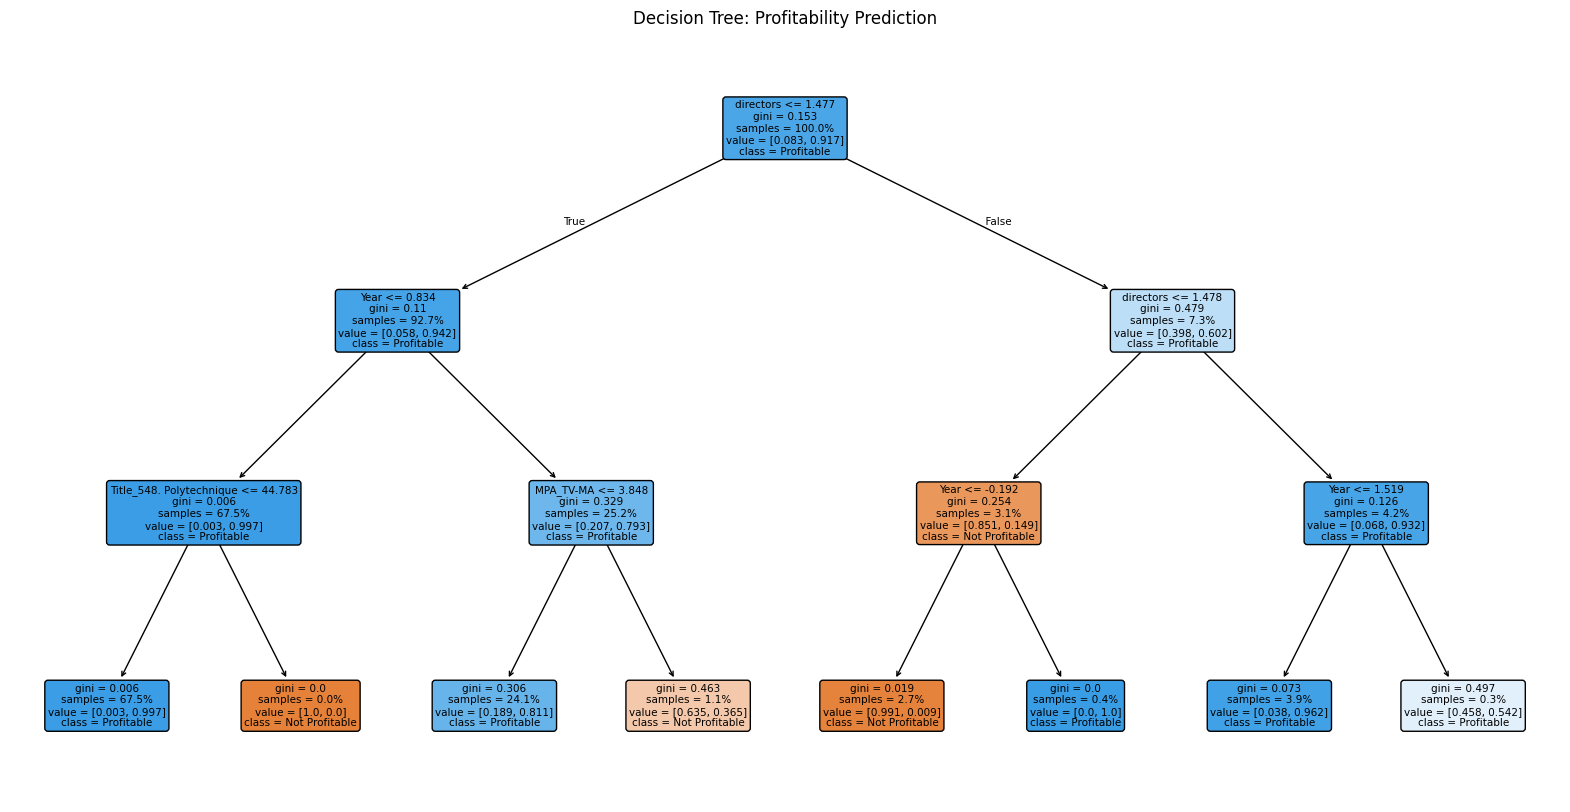

In [8]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    dt_clf, 
    filled=True,    # 색 채우기 옵션 (특정 클래스의 비율 표현)
    feature_names=X.columns,    # 특성 이름
    class_names=['Not Profitable', 'Profitable'],  # 클래스 이름
    rounded=True,  # 노드를 둥글게 표시
    proportion=True  # 비율 표시
)
plt.title("Decision Tree: Profitability Prediction")

plt.savefig('Profit_sample.png')
plt.show()

Train Accuracy: 0.75
Test Accuracy: 0.75


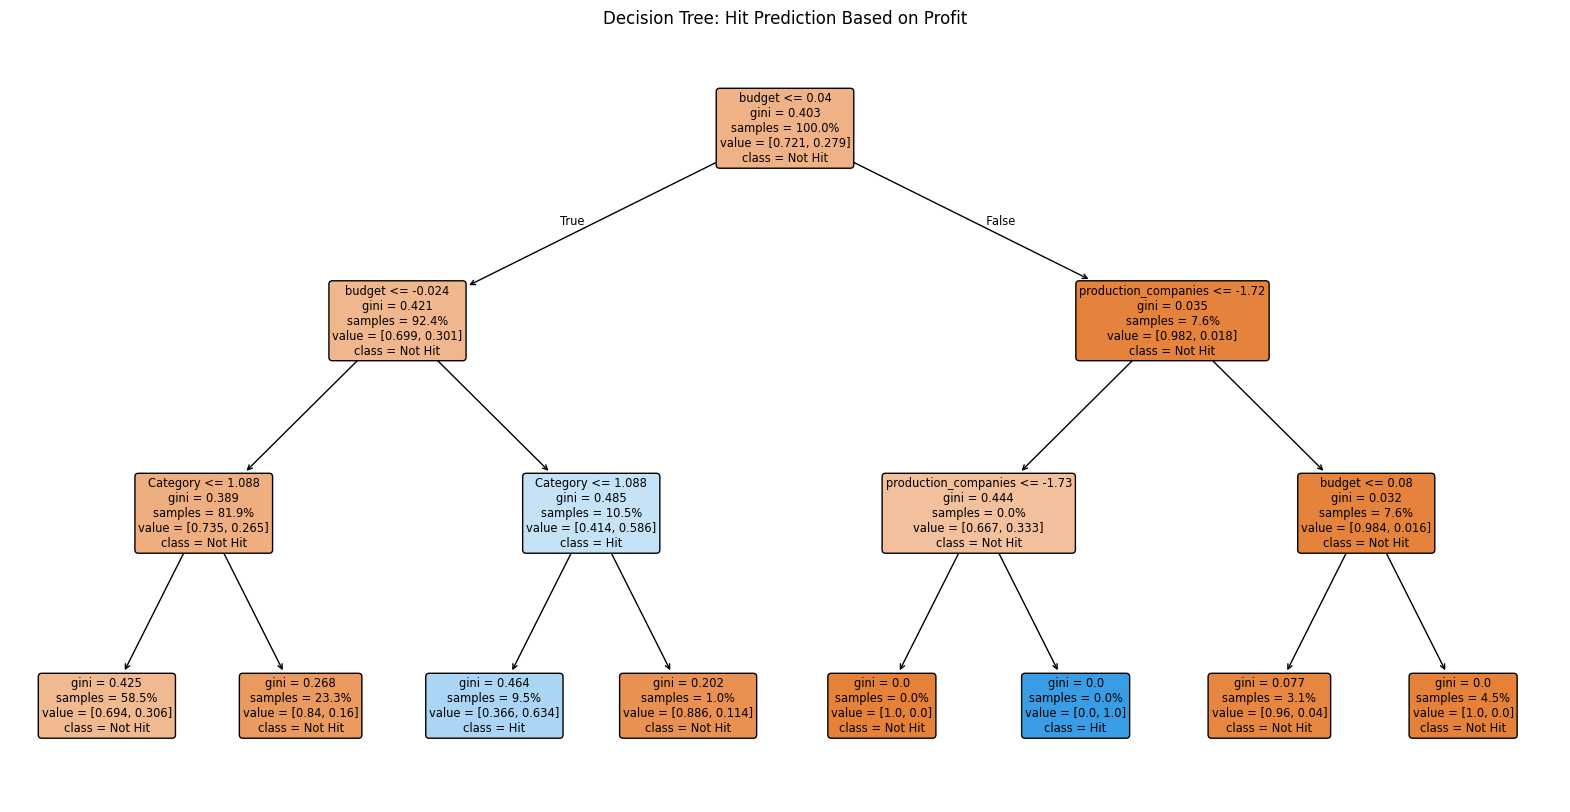

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler

# 데이터 로드
df = pd.read_csv('./data/encoded_movies_data.csv')

# Profit을 기준으로 Hit 여부 생성
df['Hit'] = (df['Profit'] >= 100).astype(int)  # Profit > 0 -> Hit(1), else -> Not Hit(0)

# X, y 분리
X = df.drop(['Profit', 'Hit','Year','Title','Duration','MPA'], axis=1)  # Hit을 제외한 나머지를 독립 변수로 사용
y = df['Hit']

# 문자열 데이터 처리 (범주형 변환)
categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 결정 트리 모델 학습
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)
dt_clf.fit(X_train_scaled, y_train)

# 모델 성능 평가
train_score = dt_clf.score(X_train_scaled, y_train)
test_score = dt_clf.score(X_test_scaled, y_test)
print(f"Train Accuracy: {train_score:.2f}")
print(f"Test Accuracy: {test_score:.2f}")

# 결정 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(
    dt_clf, 
    filled=True, 
    feature_names=X.columns, 
    class_names=['Not Hit', 'Hit'],  # 0 -> Not Hit, 1 -> Hit
    rounded=True, 
    proportion=True
)
plt.title("Decision Tree: Hit Prediction Based on Profit")
plt.savefig('hit_decision_tree.png')
plt.show()


In [10]:
# 사용자 입력 기반 예측 함수
def predict_with_column_input():
    print("\n--- Select one column to provide a value for ---")
    print(f"Available columns: {list(X.columns)}")

    selected_column = input("Enter the column name you want to provide a value for: ").strip()
    if selected_column not in X.columns:
        print("Invalid column name. Please restart and select a valid column.")
        return

    try:
        # 입력값 받기
        value = input(f"Enter the value for {selected_column}: ").strip()

        # y_pred를 계산하기 위한 입력값 생성
        X_test_custom = pd.DataFrame([X_test.iloc[0]])  # 테스트 데이터에서 샘플 하나를 복사
        X_test_custom[selected_column] = value  # 사용자 입력값 업데이트

        # 스케일링 적용
        X_test_custom_scaled = scaler.transform(X_test_custom)

        # 예측 수행
        y_pred = dt_clf.predict(X_test_custom_scaled)[0]
        y_pred_proba = dt_clf.predict_proba(X_test_custom_scaled)[0]

        # 결과 출력
        print("\n--- Prediction Result ---")
        print(f"Input Column: {selected_column}")
        print(f"Input Value: {value}")
        print(f"Prediction: {'Hit' if y_pred == 1 else 'Not Hit'}")
        print(f"Confidence: {y_pred_proba[y_pred] * 100:.2f}%")

    except ValueError:
        print("Invalid input. Please restart and provide a valid value.")

# 사용자 입력 기반 예측 실행
predict_with_column_input()


--- Select one column to provide a value for ---
Available columns: ['budget', 'directors', 'writers', 'stars', 'production_companies', 'Category']
Invalid column name. Please restart and select a valid column.
